In [1]:
# Importing the major libraries that I'll use frequently

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the entire training data 
df_all = pd.read_csv('exercise_03_train.csv')
df_all.shape

(40000, 101)

In [3]:
#Next I want to break up the dataset into a training and a validation set. This is so that I can evaluate my model 
# performance and pick the best one for submission. I'll do that by randomly sampling the data and hold out 10% of it

from sklearn.utils.random import sample_without_replacement

train_indices = sample_without_replacement(df_all.shape[0],0.9*df_all.shape[0])

df_train = df_all.iloc[train_indices, :]
df_val = df_all.loc[~df_all.index.isin(train_indices)]


In [4]:
# Let's look at what the data looks like
df_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
11936,289.102899,-0.339465,8.787572,-0.369265,-12.987640,-7.687680,-0.279364,5.205581,-9.325694,-2.372320,...,-10.363066,6.051103,asia,-6.670860,11.616793,1.976490,7.330155,0.625005,-9.435367,0
34228,103.000012,-0.556992,16.640207,-21.415618,14.840659,-22.733938,2.648298,-6.964009,29.777142,-1.620752,...,-0.799987,2.699803,asia,5.140007,-25.823262,-8.259279,-1.574488,-1.175024,5.226097,0
13590,-211.227679,0.030494,-23.140641,10.479035,8.335368,-8.003124,-0.477954,-2.491795,15.291609,0.424338,...,7.855685,2.224814,america,-2.394115,2.581896,-11.014485,1.477796,0.007509,-16.689128,0
18005,-6.754799,-0.110071,4.139523,19.723474,-30.170713,-1.849988,-2.288129,13.130751,17.392594,3.893793,...,2.160251,4.198844,asia,-5.352830,56.653738,23.042670,6.663089,0.149305,9.218203,0
21880,-70.604960,0.333705,-6.633841,-6.392399,-82.119359,13.180366,-1.660773,-0.120308,-12.483775,5.785278,...,1.699851,0.441591,asia,-0.332911,0.276395,4.681679,8.890574,2.148798,2.170935,1


In [5]:
# Some summary stats on the various columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 11936 to 9147
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 28.0+ MB


In [6]:
df_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
count,35990.000000,35990.000000,35995.000000,35990.000000,35993.000000,35991.000000,35993.000000,35991.000000,35993.000000,35992.000000,...,35994.000000,35998.000000,35993.000000,35991.000000,35994.000000,35987.000000,35990.000000,35993.000000,35990.000000,36000.000000
mean,23.142863,-0.059419,1.646771,-0.818722,0.174384,-0.856173,-0.002114,-0.051110,-7.703699,-0.054462,...,-14.312515,0.012553,-0.013717,-0.060783,0.026023,-0.495708,-1.077251,0.004568,0.332343,0.201639
std,108.161414,0.276310,36.568143,16.674244,40.990287,21.226380,0.740144,6.625178,35.477110,6.260966,...,152.929087,5.012002,6.457874,5.633694,32.400690,13.257333,7.679538,1.021982,8.558674,0.401230
min,-413.886484,-1.170678,-155.506382,-72.148195,-154.979397,-85.536249,-2.882761,-24.763804,-142.924309,-24.544850,...,-645.933547,-19.361109,-28.136665,-24.420972,-147.149165,-60.310880,-30.759058,-4.264671,-35.844332,0.000000
25%,-50.259930,-0.245431,-22.951851,-12.098849,-27.521683,-15.204480,-0.503378,-4.526948,-31.471776,-4.277335,...,-115.637483,-3.382143,-4.358525,-3.901572,-21.688328,-9.378674,-6.245907,-0.684131,-5.451291,0.000000
50%,23.301143,-0.061679,1.817638,-0.778700,0.031158,-0.778572,0.000232,-0.024429,-7.694888,-0.093606,...,-11.010694,-0.002198,-0.040010,-0.052450,0.338284,-0.437486,-1.056052,0.004741,0.295914,0.000000
75%,95.455303,0.124104,26.321257,10.469497,27.718219,13.559473,0.490674,4.407649,15.915038,4.175501,...,89.399133,3.392458,4.363905,3.757270,22.040213,8.470891,4.083866,0.692397,6.149262,0.000000
max,499.670953,1.094158,146.662970,65.122126,174.290057,81.773484,3.704431,32.662041,180.625693,24.063544,...,599.273329,22.648086,27.252550,23.787097,134.227175,54.289151,32.236033,4.114639,36.351247,1.000000


In [7]:
# Looks like some of the columns have dtype object. Lets take a closer look at these.
object_columns = df_train.select_dtypes(include=['object']).columns
df_train[object_columns].head()

,x34,x35,x41,x45,x68,x93
11936,volkswagon,wed,$313.34,0.01%,Jun,asia
34228,volkswagon,wed,$1015.4,0.0%,Jun,asia
13590,Toyota,wed,$-1009.2,0.0%,Apr,america
18005,bmw,wed,$-240.66,-0.01%,Jun,asia
21880,Honda,wed,$-665.71,-0.0%,May,asia


In [8]:
# Now to be able to use these in building the model - we need to see what they contain and maybe convert them to quantitative
# form that the model can interpret
df_train['x34'].value_counts()
#plt.subplots(figsize=(18,18))
#sns.countplot(df['x34'], hue = df['y'])

volkswagon    11341
Toyota         9768
bmw            6594
Honda          4660
tesla          2025
chrystler      1111
nissan          301
ford            157
mercades         25
chevrolet        11
Name: x34, dtype: int64

In [9]:
# Looks like a bunch of car makes. Now I want to see whether these actually have a correlation to the predicted variable. 
 

df_train[['x34','y']].groupby('x34').count()
df_train[['x34','y']].groupby('x34').sum()/df_train[['x34','y']].groupby('x34').count()

,y
x34,
Honda,0.202361
Toyota,0.204238
bmw,0.203973
chevrolet,0.090909
chrystler,0.191719
ford,0.222930
mercades,0.160000
nissan,0.199336
tesla,0.198519


In [10]:
# I want to do a similar analysis for the other string columns
df_train['x35'].replace(to_replace=['wed', 'thur', 'thurday', 'fri'], value=['wednesday', 'thursday','thursday', 'friday'], inplace=True)
df_train['x35'].value_counts()


#plt.subplots(figsize=(18,18))
#sns.countplot(df['x35'], hue = df['y'])

c:\users\pradhyum\appdata\local\programs\python\python35\lib\site-packages\pandas\core\generic.py:6576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


wednesday    18673
thursday     15967
tuesday        800
friday         490
monday          61
Name: x35, dtype: int64

In [11]:
df_train[['x35','y']].groupby('x35').count()
df_train[['x35','y']].groupby('x35').sum()/df_train[['x35','y']].groupby('x35').count()

# In this case, the base rate of y=1 vs y=0 is actually different between the various categories. SO this contains information that the model might use
# to predict the class.

,y
x35,
friday,0.171429
monday,0.409836
thursday,0.171604
tuesday,0.338750
wednesday,0.221603


In [12]:
# For the column where there seemed to be a relationship to y, I'm going to convert it to a categorical variable 

df_train['x35'] = df_train['x35'].factorize()[0]
#df['x41'] = df['x41'].str.strip('$')#.astype('float64')
df_train['x45'] = df_train['x45'].factorize()[0]


c:\users\pradhyum\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\pradhyum\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:
df_train[['x68','y']].groupby('x68').sum()/df_train[['x68','y']].groupby('x68').count()
df_train['x68'] = df_train['x68'].factorize()[0]

c:\users\pradhyum\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
(df_train['x68']==-1).sum()

9

In [15]:
# the columns x34 and x93 don't have any relationship to y i.e. they don't really provide any information regarding the 
# predicted variable

df_train[['x93','y']].groupby('x93').sum()/df_train[['x93','y']].groupby('x93').count()
df_train = df_train.drop(['x34','x93'], axis=1)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 11936 to 9147
Data columns (total 99 columns):
x0     35990 non-null float64
x1     35990 non-null float64
x2     35995 non-null float64
x3     35990 non-null float64
x4     35993 non-null float64
x5     35991 non-null float64
x6     35993 non-null float64
x7     35991 non-null float64
x8     35993 non-null float64
x9     35992 non-null float64
x10    35992 non-null float64
x11    35994 non-null float64
x12    35989 non-null float64
x13    35988 non-null float64
x14    35998 non-null float64
x15    35995 non-null float64
x16    35995 non-null float64
x17    35991 non-null float64
x18    35986 non-null float64
x19    35992 non-null float64
x20    35995 non-null float64
x21    35990 non-null float64
x22    35995 non-null float64
x23    35993 non-null float64
x24    35989 non-null float64
x25    35993 non-null float64
x26    35992 non-null float64
x27    35992 non-null float64
x28    35991 non-null float64
x29    35998 non-n

In [17]:
# Column x41 is some amounts in dollars - this could be useful so we just need to convert it to floats
df_train['x41'] = df_train['x41'].apply(lambda x: str(x).strip('$'))

In [18]:
df_train['x41'] = df_train['x41'].astype('float')

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 11936 to 9147
Data columns (total 99 columns):
x0     35990 non-null float64
x1     35990 non-null float64
x2     35995 non-null float64
x3     35990 non-null float64
x4     35993 non-null float64
x5     35991 non-null float64
x6     35993 non-null float64
x7     35991 non-null float64
x8     35993 non-null float64
x9     35992 non-null float64
x10    35992 non-null float64
x11    35994 non-null float64
x12    35989 non-null float64
x13    35988 non-null float64
x14    35998 non-null float64
x15    35995 non-null float64
x16    35995 non-null float64
x17    35991 non-null float64
x18    35986 non-null float64
x19    35992 non-null float64
x20    35995 non-null float64
x21    35990 non-null float64
x22    35995 non-null float64
x23    35993 non-null float64
x24    35989 non-null float64
x25    35993 non-null float64
x26    35992 non-null float64
x27    35992 non-null float64
x28    35991 non-null float64
x29    35998 non-n

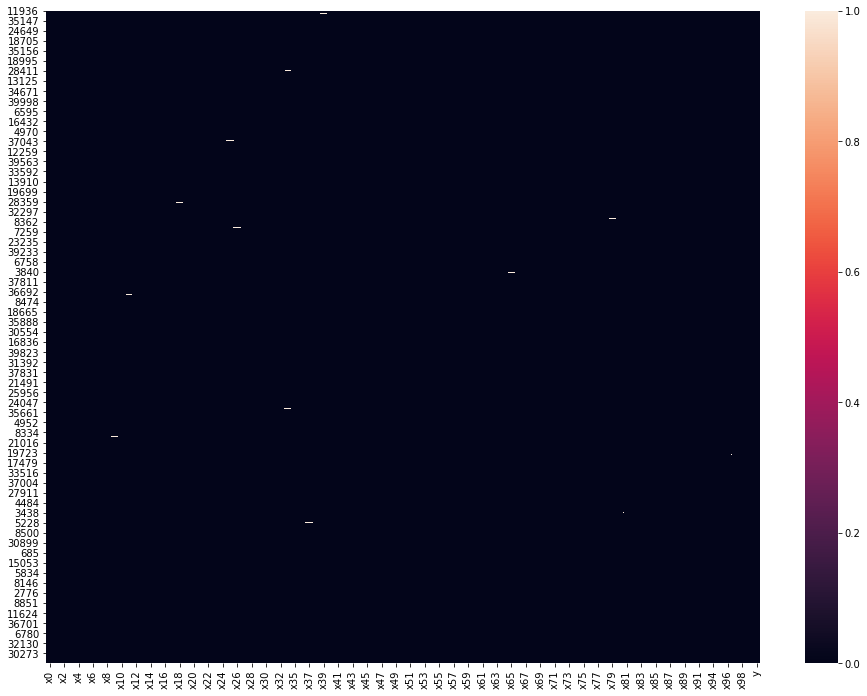

In [20]:
# I want to visualize the missing data in the dataset. I like to use a heatmap so I can see where they are missing
plt.subplots(figsize=(16,12))
sns.heatmap(df_train.isnull())

In [21]:
# Looks like there is very few missing data entries. Let's try to quantify the missing entries as % of total data by column
num_missing = df_train.isnull().sum()
percent_missing = df_train.isnull().sum()/df_train.isnull().count()
Missing_df = pd.concat([num_missing, percent_missing], axis=1, keys=['Num Missing', 'Percentage'])
Missing_df.sort_values(by=['Percentage'],ascending=False)

,Num Missing,Percentage
x85,15,0.000417
x18,14,0.000389
x96,13,0.000361
x55,12,0.000333
x13,12,0.000333
x69,12,0.000333
x12,11,0.000306
x65,11,0.000306
x63,11,0.000306
x24,11,0.000306


In [22]:
# Since they are such low percentages and they appear to be random, I'm going to simply drop any rows that have missing values.
# There are better ways to handle these by imputing them rigorously but considering how few there are - I don;t think it's
# worth it.

In [23]:
df_train.dropna(inplace=True)
#df.info()

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35312 entries, 11936 to 9147
Data columns (total 99 columns):
x0     35312 non-null float64
x1     35312 non-null float64
x2     35312 non-null float64
x3     35312 non-null float64
x4     35312 non-null float64
x5     35312 non-null float64
x6     35312 non-null float64
x7     35312 non-null float64
x8     35312 non-null float64
x9     35312 non-null float64
x10    35312 non-null float64
x11    35312 non-null float64
x12    35312 non-null float64
x13    35312 non-null float64
x14    35312 non-null float64
x15    35312 non-null float64
x16    35312 non-null float64
x17    35312 non-null float64
x18    35312 non-null float64
x19    35312 non-null float64
x20    35312 non-null float64
x21    35312 non-null float64
x22    35312 non-null float64
x23    35312 non-null float64
x24    35312 non-null float64
x25    35312 non-null float64
x26    35312 non-null float64
x27    35312 non-null float64
x28    35312 non-null float64
x29    35312 non-n

In [25]:
# Remember we converted some columns to categoricals. The factorize method actually fills na values as category -1.
# So I need to find these and delete them as well.

In [26]:

continuous_columns = df_train.select_dtypes(include=['float64']).columns
categorical_columns = df_train.select_dtypes(include=['int64']).columns
continuous_columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42',
       'x43', 'x44', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53',
       'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63',
       'x64', 'x65', 'x66', 'x67', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74',
       'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84',
       'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95',
       'x96', 'x97', 'x98', 'x99'],
      dtype='object')

In [27]:
df_train = df_train[~(df_train[categorical_columns] == -1).any(axis=1)]


In [28]:
# Function to normalize the data so the various columns have the same scale. 
def GetNormalizedData(data_in):
    from sklearn.preprocessing import MinMaxScaler
    return pd.DataFrame(MinMaxScaler().fit_transform(data_in), columns=data_in.columns)

In [29]:
# There are many reasons why normalizing the data is beneficial. 
# 1. It can help speed up the optimization algorithm used by the ML model
# 2. Some of the feature selection algorithms may be sensitive to differences in feature scales
# 3. Some models that depend on eucledian distance calculation may are improved by feature scaling.
normalized_df = GetNormalizedData(df_train[continuous_columns])
normalized_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35289 entries, 0 to 35288
Data columns (total 95 columns):
x0     35289 non-null float64
x1     35289 non-null float64
x2     35289 non-null float64
x3     35289 non-null float64
x4     35289 non-null float64
x5     35289 non-null float64
x6     35289 non-null float64
x7     35289 non-null float64
x8     35289 non-null float64
x9     35289 non-null float64
x10    35289 non-null float64
x11    35289 non-null float64
x12    35289 non-null float64
x13    35289 non-null float64
x14    35289 non-null float64
x15    35289 non-null float64
x16    35289 non-null float64
x17    35289 non-null float64
x18    35289 non-null float64
x19    35289 non-null float64
x20    35289 non-null float64
x21    35289 non-null float64
x22    35289 non-null float64
x23    35289 non-null float64
x24    35289 non-null float64
x25    35289 non-null float64
x26    35289 non-null float64
x27    35289 non-null float64
x28    35289 non-null float64
x29    35289 non-null

In [30]:
df_train['y'].value_counts().sum()

35289

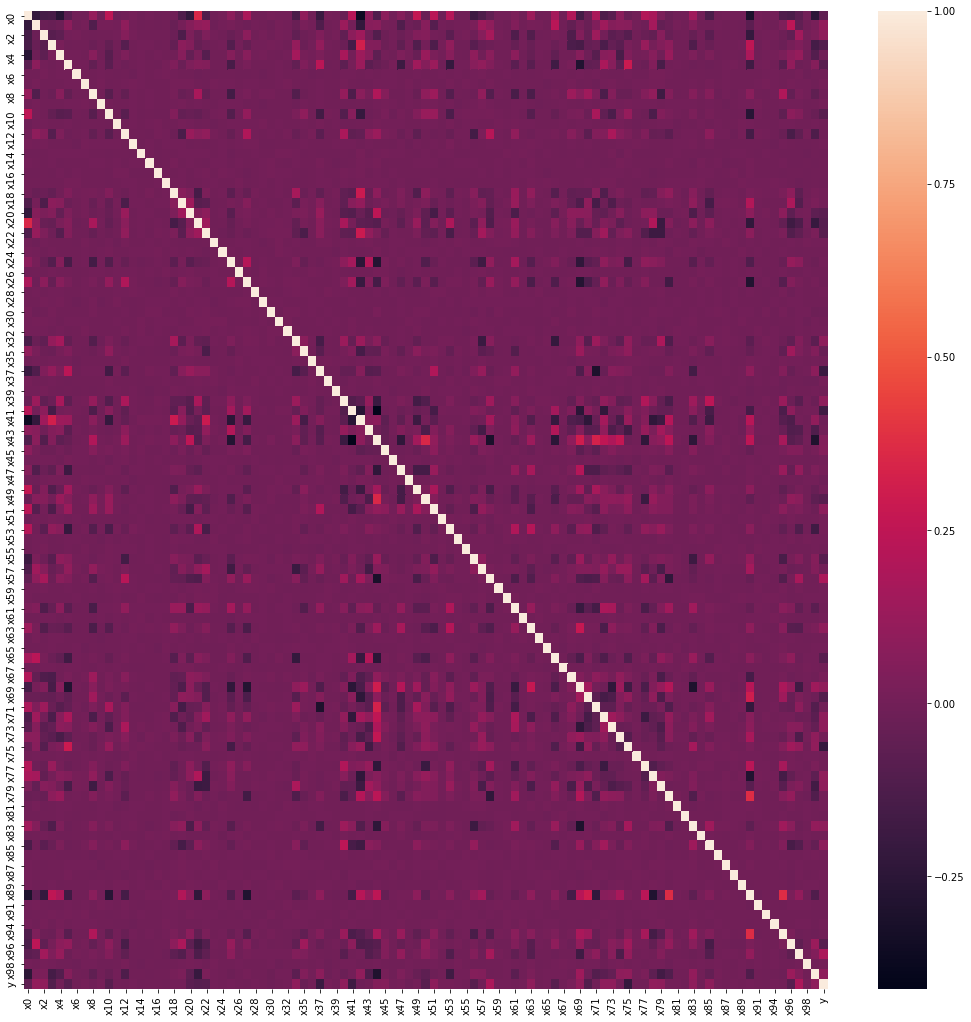

In [31]:
# We need to find ways to reduce dimensionality. I'll first check if there are highly correlated variables we can eliminate
plt.subplots(figsize=(18,18))
sns.heatmap(df_train.corr())

In [32]:
corr_matrix = df_train.corr().abs()
#type(corr_matrix)
upper = np.triu(corr_matrix,1)
upper_df = pd.DataFrame(upper, columns=corr_matrix.columns)
to_drop = [column for column in upper_df.columns if any(abs(upper_df[column]) > 0.80)]
to_drop

[]

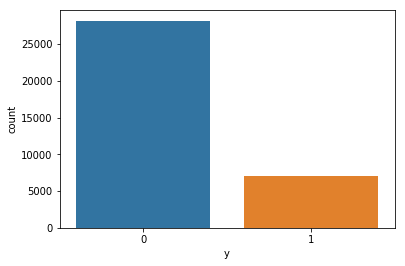

In [33]:
# Next lets look at the predicted variable to see how balanced the dataset is. This will affect which models we choose. 
# If there is an extreme imbalance we may also need to do some special sampling to overcome this imbalance.
sns.countplot(df_train['y']) #df['y']

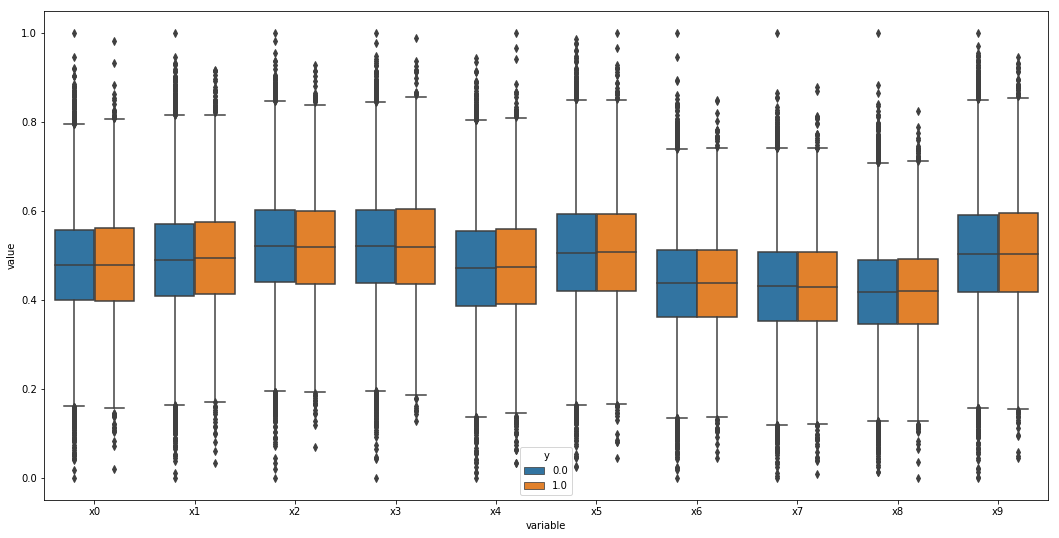

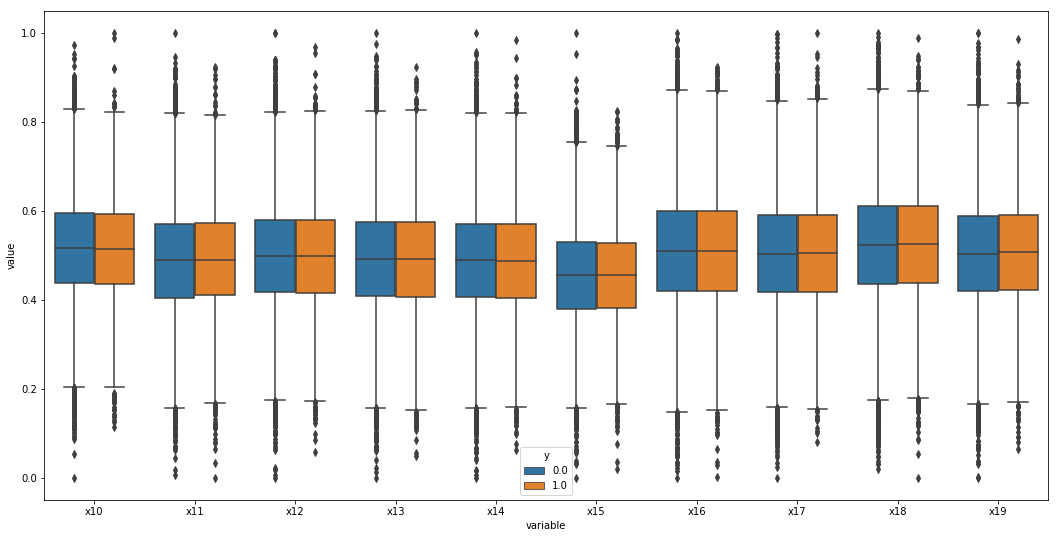

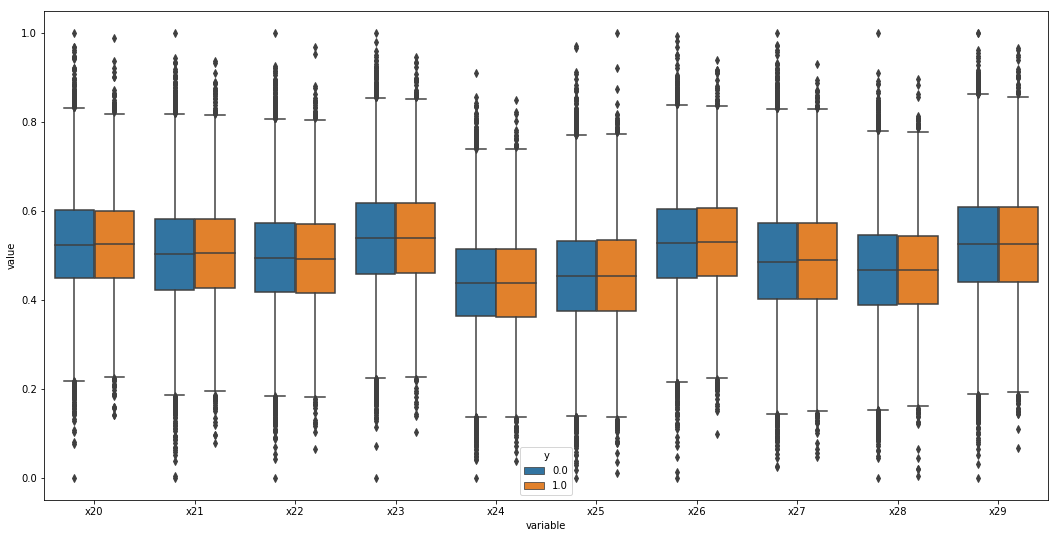

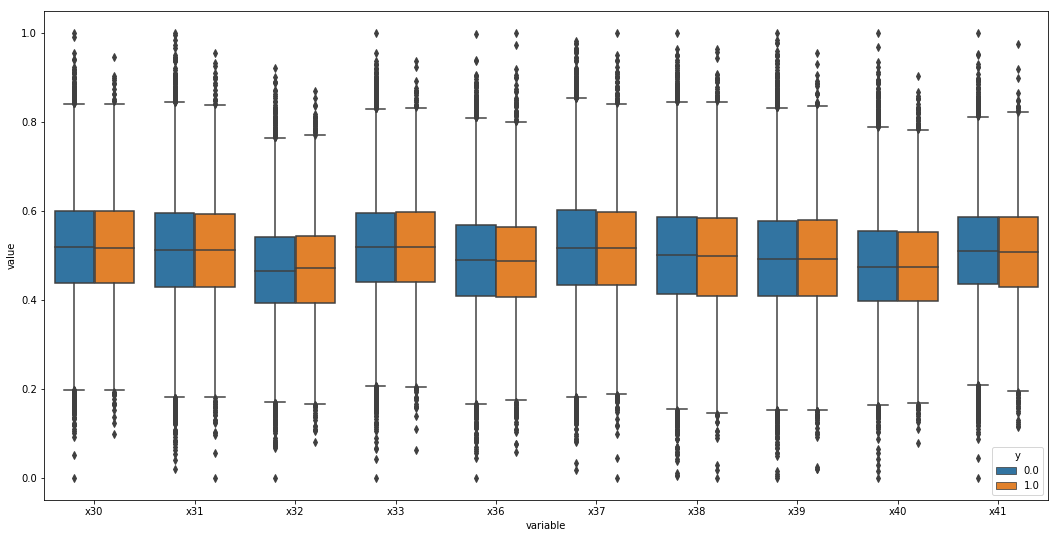

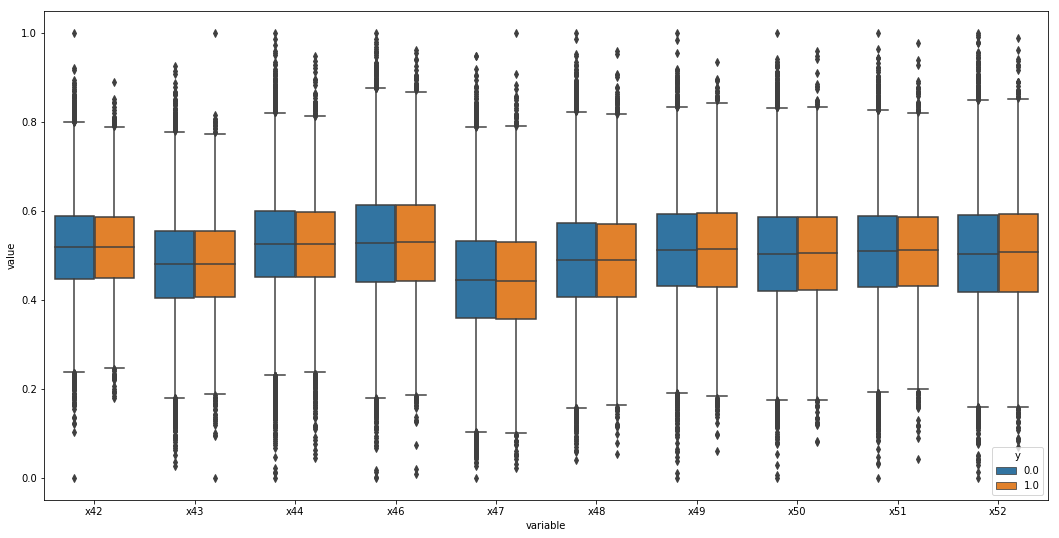

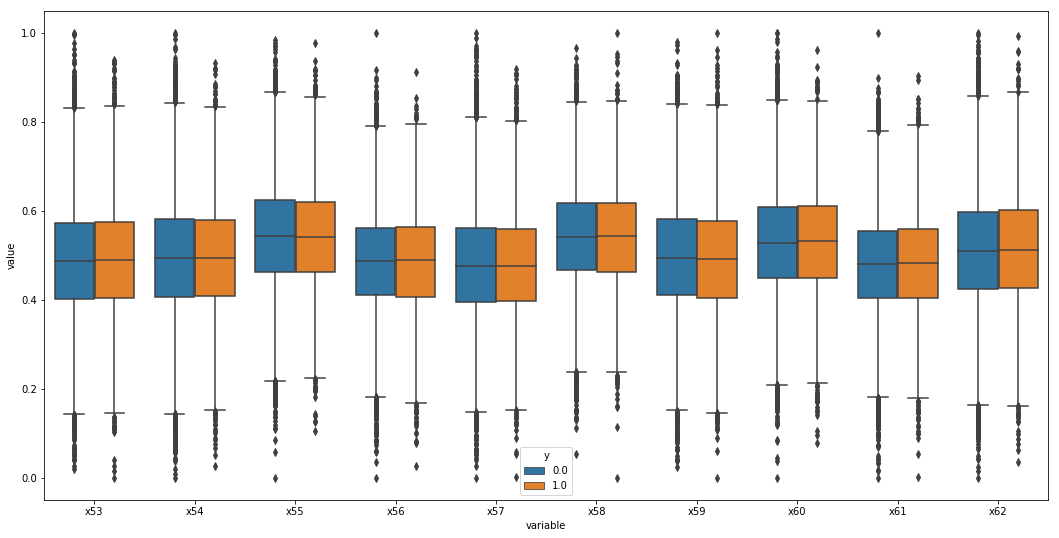

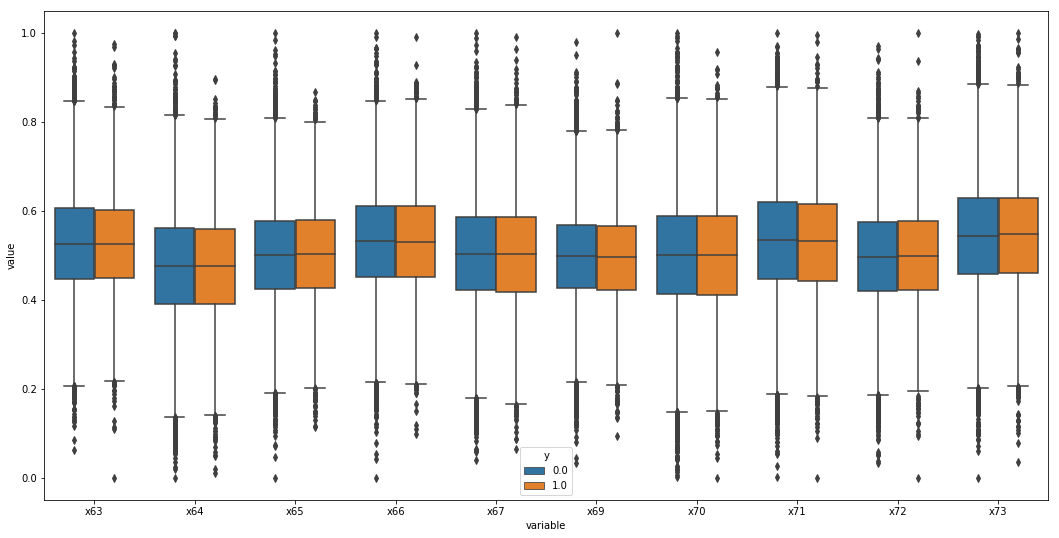

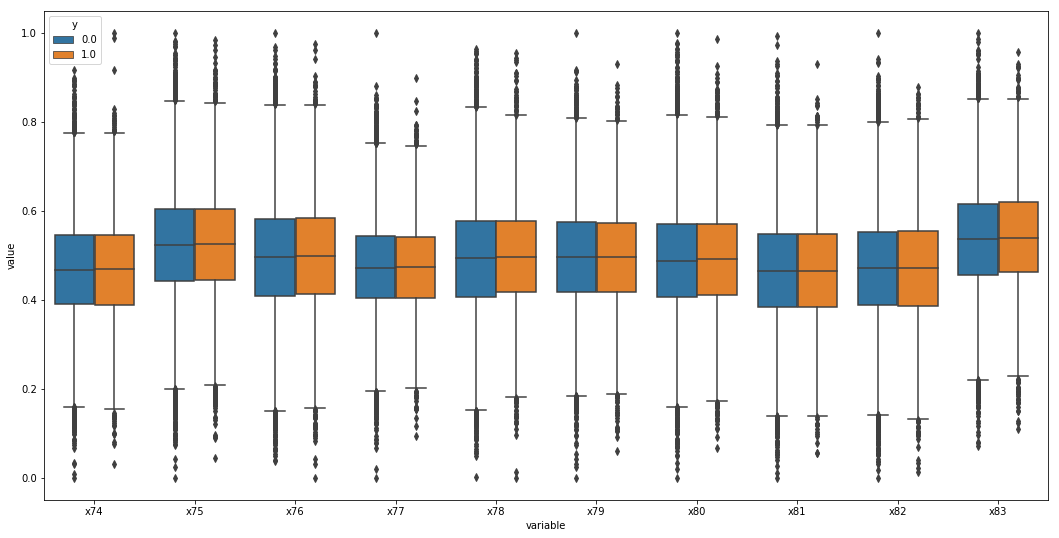

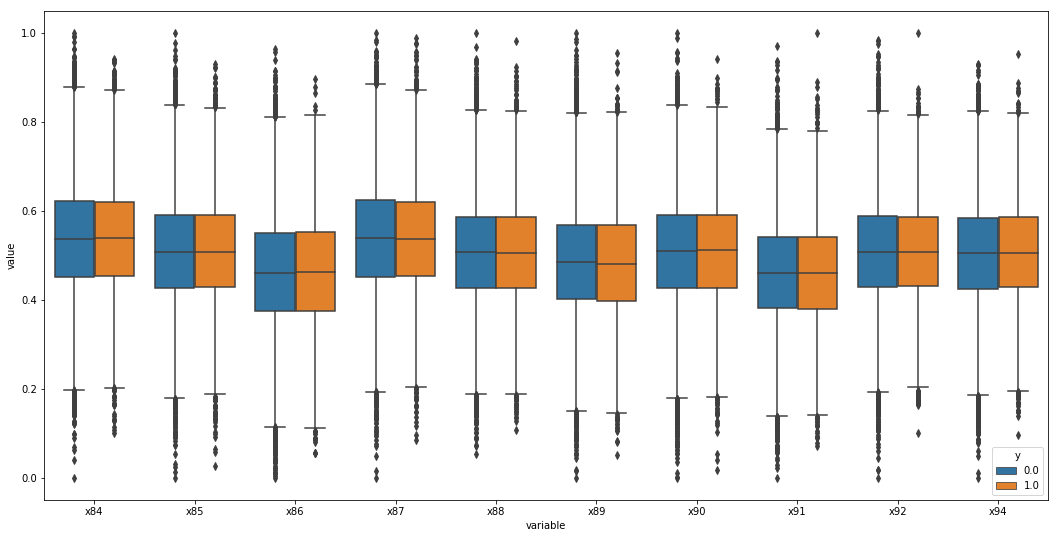

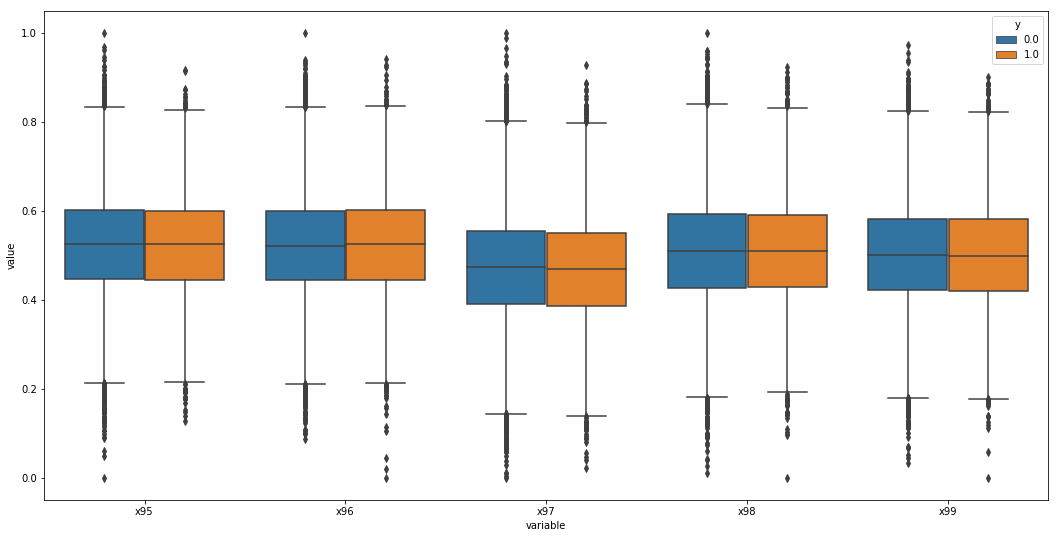

In [34]:
# Next plotting some box plots and hue by class to see how separable the data is
list_of_columns = normalized_df.columns
numeric_columns = df_train.select_dtypes(exclude=['object'])

i=0
while i < len(list_of_columns):
    sublist = list_of_columns[i:i+10]
    data = pd.melt(pd.concat([normalized_df,df_train['y']],axis=1), value_vars=sublist,id_vars=['y'])
    plt.subplots(figsize=(18,9))
    sns.boxplot(x='variable', y='value', data=data, hue=data['y'])
    i += 10

In [35]:
categorical_df = df_train[categorical_columns].reset_index(drop=True)

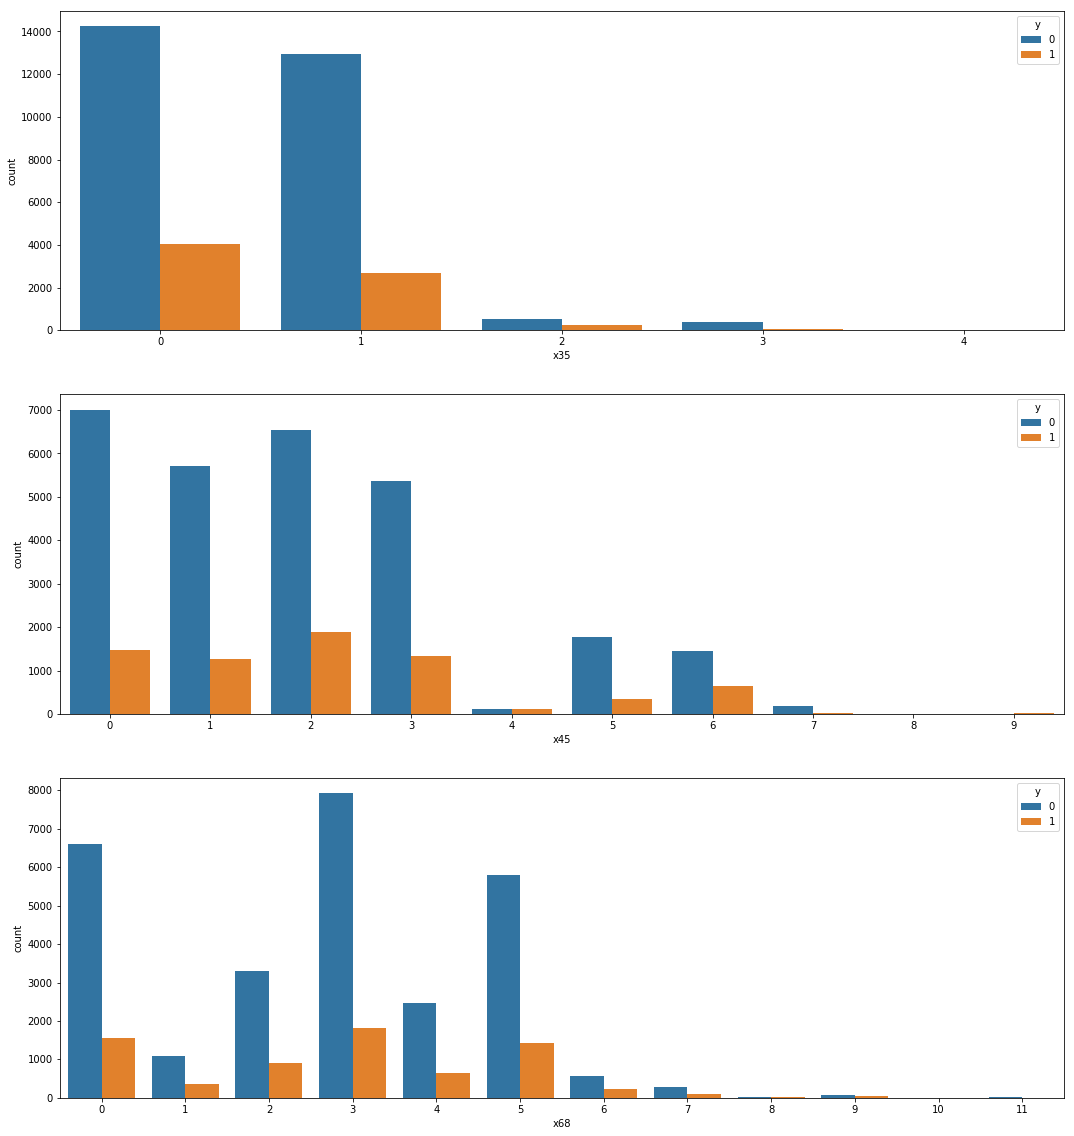

In [36]:
# Lets see if the categorical varibles are good predictors
fig, ax = plt.subplots(3,1,figsize=(18,20))
for i, feature in enumerate(categorical_columns[:-1]):
    sns.countplot(x=categorical_df[feature],hue=categorical_df['y'], ax=ax[i])

In [37]:
cleaned_dataset = pd.concat([normalized_df,categorical_df],axis=1)
X = cleaned_dataset.drop(['y'],axis=1)
y = cleaned_dataset['y']
X.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42',
       'x43', 'x44', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53',
       'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63',
       'x64', 'x65', 'x66', 'x67', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74',
       'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84',
       'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95',
       'x96', 'x97', 'x98', 'x99', 'x35', 'x45', 'x68'],
      dtype='object')

In [38]:
len(X.columns)

98

In [73]:
# Now I will use a few feature selection algorithms to see if I can select important features.
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(n_estimators=100, max_depth=4)
rfe_feat_sel = RFECV(estimator=rfc, step=1, cv=5,scoring='accuracy', n_jobs=-1)
rfe_feat_sel.fit(X,y)

print('Optimal number of features :', rfe_feat_sel.n_features_)
print('Best features :', X.columns[rfe_feat_sel.support_])

Optimal number of features : 9
Best features : Index(['x37', 'x41', 'x51', 'x53', 'x58', 'x66', 'x75', 'x97', 'x99'], dtype='object')


In [74]:
feature_vector_RFE = list(X.columns.values[rfe_feat_sel.support_])

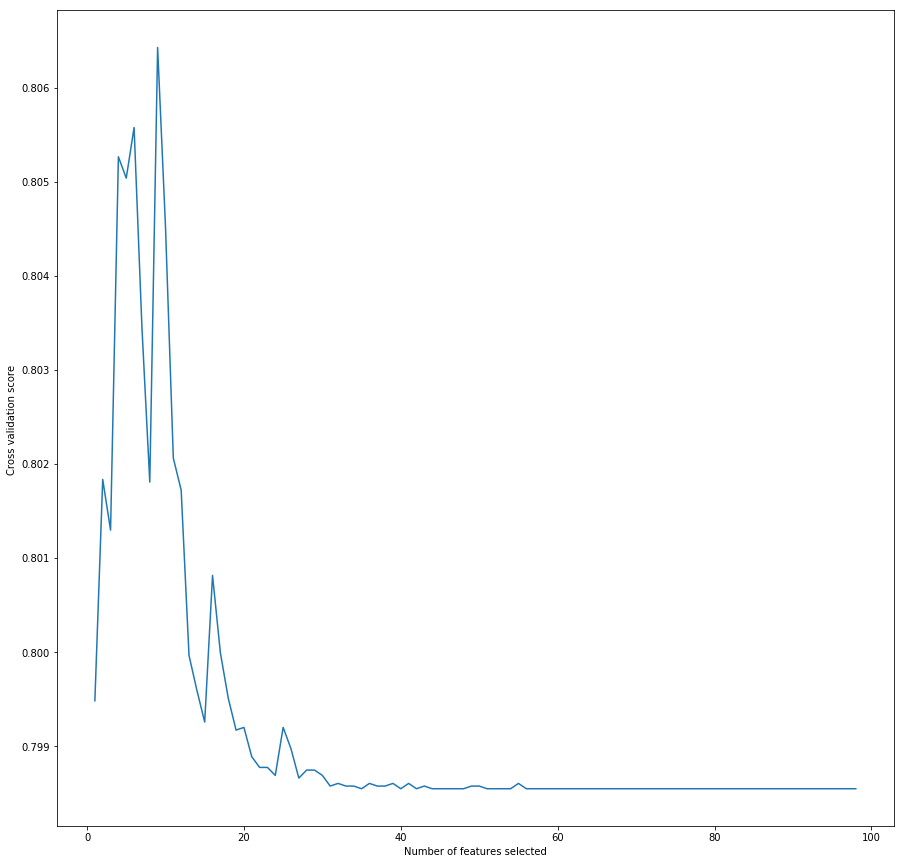

In [75]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,15))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score ")
plt.plot(range(1, len(rfe_feat_sel.grid_scores_) + 1), rfe_feat_sel.grid_scores_)
plt.show()

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

lasso_feat_sel = LassoCV(cv = 5)

fs = SelectFromModel(lasso_feat_sel, threshold=0.5)
fs.fit(X, y)
n_features = fs.transform(X).shape[1]

In [46]:
print('Optimal number of features: ', n_features)
print('Best features: ', X.columns[fs.get_support()])

Optimal number of features:  11
Best features:  Index(['x12', 'x37', 'x44', 'x50', 'x56', 'x58', 'x71', 'x75', 'x83', 'x90',
       'x97'],
      dtype='object')


In [47]:
feature_vector_Lasso = list(X.columns.values[fs.get_support()])


In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find the best features
select_feature = SelectKBest(chi2, k=20).fit(X, y)
feat_scores_df = pd.DataFrame({'Score':select_feature.scores_, 'Column': X.columns}).sort_values(by='Score',ascending=False).head(25)
print('Top 25 features: ', feat_scores_df['Column'].head(15).values)
feature_vector_univariate = list(feat_scores_df['Column'].head(15).values)

Top 25 features:  ['x45' 'x75' 'x37' 'x97' 'x58' 'x41' 'x35' 'x68' 'x70' 'x1' 'x3' 'x78'
 'x73' 'x50' 'x99']


In [76]:
final_selected_features = list(set().union(feature_vector_RFE,feature_vector_Lasso,feature_vector_univariate))

len(final_selected_features)

24

In [50]:
# Now lets try to actually buld some models
from sklearn.linear_model import LogisticRegressionCV
log_clf_selected = LogisticRegressionCV(cv=5, random_state=0, max_iter=800, class_weight='balanced', scoring='roc_auc').fit(X[final_selected_features], y)
log_clf = LogisticRegressionCV(cv=5, random_state=0, max_iter=800, class_weight='balanced', scoring='roc_auc').fit(X,y)

In [51]:
y_scores_all = log_clf.decision_function(X)

In [77]:
# I'm using a random search for hyperparamter tuning.
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_all = GradientBoostingClassifier().fit(X,y)
grad_boost_selected = GradientBoostingClassifier().fit(X[final_selected_features],y)

from sklearn.model_selection import RandomizedSearchCV
gb_clf = GradientBoostingClassifier()

# Learning rate
learning_rates = [x for x in np.linspace(0.1, 2, 10)]
# Number of trees in random forest
n_estimators = [int(x) for x in [50, 100, 200]]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 30, 3)]
max_depth.append(None)
#Min sample for splitting a node
min_sample_splits = [int(x) for x in np.linspace(2,100,10)]
# Create the random grid
random_grid = {'learning_rate': learning_rates,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_sample_splits}

#gb_clf_all = RandomizedSearchCV(estimator = gb_clf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, n_jobs = -1).fit(X,y)
#gb_clf_selected = RandomizedSearchCV(estimator = gb_clf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, n_jobs = -1).fit(X[final_selected_features],y)



In [53]:
y_scores_selected = log_clf_selected.decision_function(X[final_selected_features])

In [54]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y,y_scores_all)

0.9106246332955327

In [55]:
roc_auc_score(y,y_scores_selected)

logistic_all_train = roc_auc_score(y,y_scores_all)
logistic_selected_train = roc_auc_score(y,y_scores_selected)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rfc_clf = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in [50, 100, 200]]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 20, 3)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [101]:
#rf_random_for_all = RandomizedSearchCV(estimator = rfc_clf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, n_jobs = -1)
#rf_random_selected = RandomizedSearchCV(estimator = rfc_clf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, n_jobs = -1)

rfc_all = RandomForestClassifier().fit(X,y)
rfc_selected = RandomForestClassifier().fit(X[final_selected_features],y)

c:\users\pradhyum\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\pradhyum\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
predictions_rfc_all = rfc_all.predict_proba(X)
predictions_rfc_selected = rfc_selected.predict_proba(X[final_selected_features])

rfc_all_train = roc_auc_score(y,predictions_rfc_all[:,1])
rfc_selected_train = roc_auc_score(y,predictions_rfc_selected[:,1])

In [59]:
# Now lets perform similar feature engineeing on the validation set and evaluate model performances
df_val['x35'] = df_val['x35'].factorize()[0]
df_val['x45'] = df_val['x45'].factorize()[0]

c:\users\pradhyum\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\pradhyum\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
df_val['x68'] = df_val['x68'].factorize()[0]

c:\users\pradhyum\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
df_val = df_val.drop(['x34','x93'], axis=1)

In [62]:
num_missing = df_val.isnull().sum()
percent_missing = df_val.isnull().sum()/df_val.isnull().count()
Missing_df = pd.concat([num_missing, percent_missing], axis=1, keys=['Num Missing', 'Percentage'])
Missing_df = Missing_df.sort_values(by=['Percentage'],ascending=False)
Missing_df[Missing_df['Num Missing']>0]

,Num Missing,Percentage
x65,3,0.00075
x17,3,0.00075
x48,3,0.00075
x51,3,0.00075
x16,3,0.00075
x56,3,0.00075
x42,2,0.00050
x13,2,0.00050
x20,2,0.00050
x15,2,0.00050


In [63]:
df_val['x41'] = df_val['x41'].apply(lambda x: str(x).strip('$'))

In [64]:
df_val['x41'] = df_val['x41'].astype('float')

In [65]:
for column in Missing_df.sort_values(by=['Percentage'],ascending=False).index:
    df_val[column].fillna((df_train[column]).mean(), inplace=True)

In [66]:
integer_columns = df_val.select_dtypes(['int64']).columns
integer_columns

Index(['x35', 'x45', 'x68', 'y'], dtype='object')

In [67]:
for column in integer_columns:
    df_val[column] = df_val[column].replace(to_replace=-1, value = df_train[column].mode().values[0])

In [68]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 23 to 39976
Data columns (total 99 columns):
x0     4000 non-null float64
x1     4000 non-null float64
x2     4000 non-null float64
x3     4000 non-null float64
x4     4000 non-null float64
x5     4000 non-null float64
x6     4000 non-null float64
x7     4000 non-null float64
x8     4000 non-null float64
x9     4000 non-null float64
x10    4000 non-null float64
x11    4000 non-null float64
x12    4000 non-null float64
x13    4000 non-null float64
x14    4000 non-null float64
x15    4000 non-null float64
x16    4000 non-null float64
x17    4000 non-null float64
x18    4000 non-null float64
x19    4000 non-null float64
x20    4000 non-null float64
x21    4000 non-null float64
x22    4000 non-null float64
x23    4000 non-null float64
x24    4000 non-null float64
x25    4000 non-null float64
x26    4000 non-null float64
x27    4000 non-null float64
x28    4000 non-null float64
x29    4000 non-null float64
x30    4000 non-null 

In [69]:
X_val = df_val.drop(['y'], axis=1)
y_val = df_val['y']

In [102]:
def Evaluate_model(model_in, X_in, y_in):
    try:
        y_scores = model_in.decision_function(X_in)
        return roc_auc_score(y_in,y_scores)
    except:
        y_scores = model_in.predict_proba(X_in)
        return roc_auc_score(y_in,y_scores[:,1])

#logistic_all_val = Evaluate_model(log_clf,X_val,y_val)
#logistic_selected_val = Evaluate_model(log_clf_selected,X_val[final_selected_features],y_val)
rfc_all_val = Evaluate_model(rf_random_for_all,X_val,y_val)
rfc_selected_val = Evaluate_model(rf_random_selected,X_val[final_selected_features],y_val)
gb_all_val = Evaluate_model(grad_boost_all, X_val, y_val)
gb_selected_val = Evaluate_model(grad_boost_selected, X_val[final_selected_features], y_val)

In [103]:
pd.DataFrame({'Model': ['Logistic', 'RFC', 'GB'], 'AUC Scores all': [logistic_all_val, rfc_all_val, gb_all_val], 'AUC Scores selected': [logistic_selected_val, rfc_selected_val, gb_selected_val]})

,AUC Scores all,AUC Scores selected,Model
0,0.399064,0.689183,Logistic
1,0.515913,0.726365,RFC
2,0.487759,0.838865,GB


In [83]:
# Looks like the tree ensemble methods are better - as expected.

In [84]:
# Finally read in test data and perform similar feature engineering and selection

In [85]:
df_test = pd.read_csv('exercise_03_test.csv')

In [86]:
df_test['x35'] = df_test['x35'].factorize()[0]
df_test['x45'] = df_test['x45'].factorize()[0]

In [87]:
df_test['x68'] = df_test['x68'].factorize()[0]

In [88]:
df_test = df_test.drop(['x34','x93'], axis=1)

In [89]:
num_missing = df_test.isnull().sum()
percent_missing = df_test.isnull().sum()/df_test.isnull().count()
Missing_df = pd.concat([num_missing, percent_missing], axis=1, keys=['Num Missing', 'Percentage'])
Missing_df = Missing_df.sort_values(by=['Percentage'],ascending=False)
Missing_df[Missing_df['Num Missing']>0]

,Num Missing,Percentage
x73,5,0.0005
x24,5,0.0005
x42,5,0.0005
x48,5,0.0005
x62,5,0.0005
x75,5,0.0005
x80,4,0.0004
x21,4,0.0004
x55,4,0.0004
x56,4,0.0004


In [90]:
df_test['x41'] = df_test['x41'].apply(lambda x: str(x).strip('$'))

In [91]:
df_test['x41'] = df_test['x41'].astype('float')

In [92]:
# Here I will imput the values for the missing entries. I'm using a simple mean imputation due to lack of time. There is room
# for significant improvement to imputation methodology
for column in Missing_df.sort_values(by=['Percentage'],ascending=False).index:
    df_test[column].fillna((X[column]).mean(), inplace=True)

In [93]:
integer_columns = df_test.select_dtypes(['int64']).columns
integer_columns

Index(['x35', 'x45', 'x68'], dtype='object')

In [94]:
for column in integer_columns:
    df_test[column] = df_test[column].replace(to_replace=-1, value = df_test[column].mode().values[0])

In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 98 columns):
x0     10000 non-null float64
x1     10000 non-null float64
x2     10000 non-null float64
x3     10000 non-null float64
x4     10000 non-null float64
x5     10000 non-null float64
x6     10000 non-null float64
x7     10000 non-null float64
x8     10000 non-null float64
x9     10000 non-null float64
x10    10000 non-null float64
x11    10000 non-null float64
x12    10000 non-null float64
x13    10000 non-null float64
x14    10000 non-null float64
x15    10000 non-null float64
x16    10000 non-null float64
x17    10000 non-null float64
x18    10000 non-null float64
x19    10000 non-null float64
x20    10000 non-null float64
x21    10000 non-null float64
x22    10000 non-null float64
x23    10000 non-null float64
x24    10000 non-null float64
x25    10000 non-null float64
x26    10000 non-null float64
x27    10000 non-null float64
x28    10000 non-null float64
x29    10000 non-null 

In [98]:
# Finally find the probabilities and write out csv.
y_scores_rf = rf_random_selected.predict_proba(df_test[final_selected_features])
y_scores_gb = grad_boost_selected.predict_proba(df_test[final_selected_features])

prob_y_rf = y_scores_rf[:,1]
prob_y_gb = y_scores_gb[:,1]

In [100]:
np.savetxt("results1.csv", prob_y_rf, delimiter=",")
np.savetxt("results2.csv", prob_y_gb, delimiter=",")
